In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Load your data from a CSV file
data = pd.read_csv('/content/drive/MyDrive/Datasets/Images/VehiclesData.csv')
data.head()

,Vehicle Count,Time Allocated (seconds),Fixed Time
0,2,5,45
1,2,5,60
2,3,7,60
3,4,7,45
4,2,5,60


In [ ]:
data.columns

Index(['Vehicle Count', 'Time Allocated (seconds)', 'Fixed Time'], dtype='object')

In [ ]:
data["Vehicle Count"].unique()

array([ 2,  3,  4,  8,  9, 11,  7,  5,  6,  1,  0, 14, 18, 24, 40, 21, 15,
       16, 20, 32, 28, 30, 29, 25, 10, 22, 12, 17, 35, 37, 13, 23, 26, 42,
       33, 27, 43, 19, 41, 31])

In [ ]:
data["Fixed Time"].unique()

array([45, 60, 30])

In [ ]:
data["Time Allocated (seconds)"].unique()

array([ 5,  7, 11, 13, 15,  9,  2, 18, 22, 28, 45, 26, 20, 24, 37, 33, 35,
       30, 41, 43, 48, 39, 50])

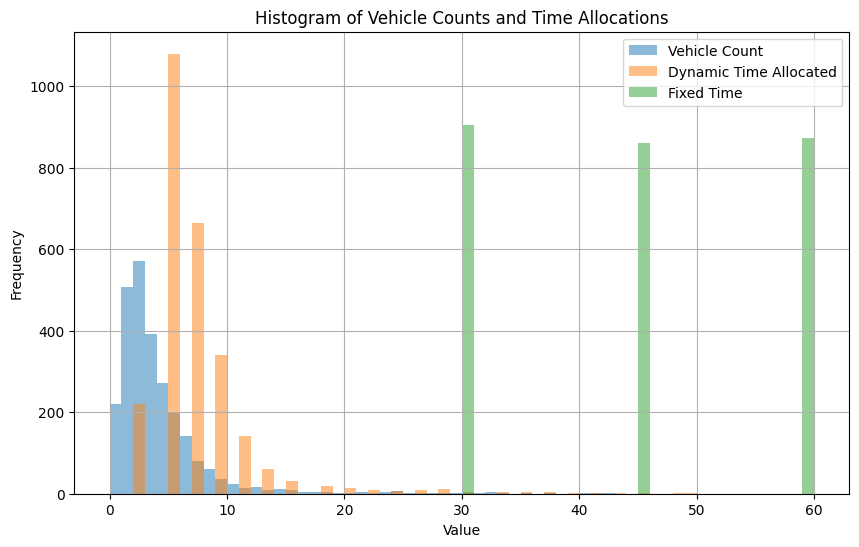

In [ ]:
import matplotlib.pyplot as plt

# Actual data from spreadsheet
vehicle_counts = data["Vehicle Count"].to_list()
dynamic_time_allocations = data["Time Allocated (seconds)"].to_list()
fixed_time = data["Fixed Time"].to_list()

# Create histograms
plt.figure(figsize=(10, 6))

# Histogram for Vehicle Counts
plt.hist(vehicle_counts, bins=range(min(vehicle_counts), max(vehicle_counts) + 1), alpha=0.5, label='Vehicle Count')

# Histogram for Dynamic Time Allocations
plt.hist(dynamic_time_allocations, bins=range(min(dynamic_time_allocations), max(dynamic_time_allocations) + 1), alpha=0.5, label='Dynamic Time Allocated')

# Histogram for Fixed Time
plt.hist(fixed_time, bins=range(min(fixed_time), max(fixed_time) + 1), alpha=0.5, label='Fixed Time')

plt.legend()
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Vehicle Counts and Time Allocations')
plt.grid(True)
plt.show()


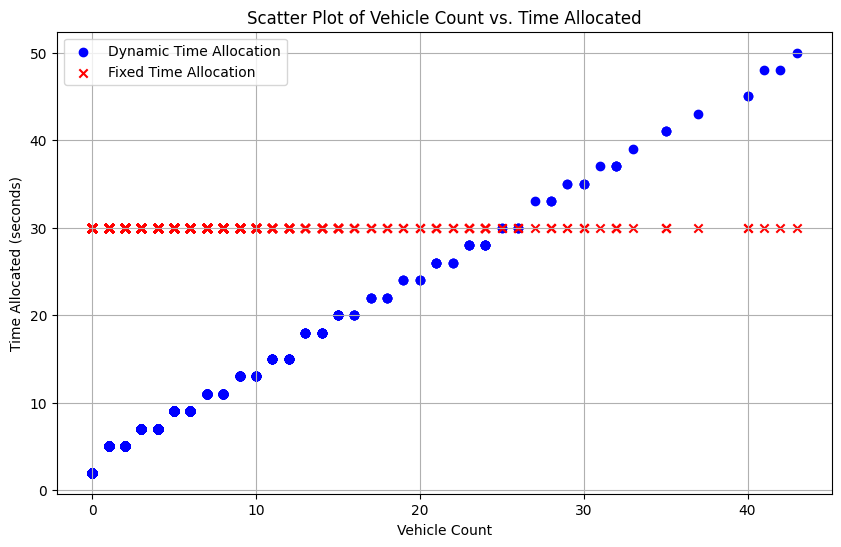

In [ ]:

# Scatter Plot
plt.figure(figsize=(10, 6))

# Scatter plot for Dynamic Time Allocation
plt.scatter(vehicle_counts, dynamic_time_allocations, c='blue', label='Dynamic Time Allocation')

# Scatter plot for Fixed Time Allocation (using average fixed time for simplicity)
plt.scatter(vehicle_counts[:len(fixed_time)], [30]*len(vehicle_counts[:len(fixed_time)]), c='red', label='Fixed Time Allocation', marker='x')

plt.xlabel('Vehicle Count')
plt.ylabel('Time Allocated (seconds)')
plt.title('Scatter Plot of Vehicle Count vs. Time Allocated')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
data.head()

,Vehicle Count,Time Allocated (seconds),Fixed Time
0,2,5,45
1,2,5,60
2,3,7,60
3,4,7,45
4,2,5,60


In [ ]:
df = data.copy()

In [ ]:
df.columns

Index(['Vehicle Count', 'Time Allocated (seconds)', 'Fixed Time'], dtype='object')

In [ ]:
df.head()

,Vehicle Count,Time Allocated (seconds),Fixed Time
0,2,5,45
1,2,5,60
2,3,7,60
3,4,7,45
4,2,5,60


In [ ]:

# Define the threshold for off-peak times
threshold = 15

# Split the data into off-peak and rush hours
off_peak_df = df[df['Vehicle Count'] <= threshold]
rush_hours_df = df[df['Vehicle Count'] > threshold]

# Display the first few rows of each part to confirm
print("Off-Peak Times Data:")
print(off_peak_df.head())

print("\nRush Hours Data:")
print(rush_hours_df.head())

Off-Peak Times Data:
   Vehicle Count  Time Allocated (seconds)  Fixed Time
0              2                         5          45
1              2                         5          60
2              3                         7          60
3              4                         7          45
4              2                         5          60

Rush Hours Data:
     Vehicle Count  Time Allocated (seconds)  Fixed Time
259             18                        22          60
261             24                        28          45
262             40                        45          60
263             21                        26          45
268             16                        20          30


In [ ]:

# Optionally, save the split data into new CSV files
off_peak_df.to_csv('off_peak_times.csv', index=False)
rush_hours_df.to_csv('rush_hours.csv', index=False)

In [ ]:
df.head()

,Vehicle Count,Time Allocated (seconds),Fixed Time
0,2,5,45
1,2,5,60
2,3,7,60
3,4,7,45
4,2,5,60


In [ ]:
df

,timestamp,vehicle_count,allocated_time,time_category
0,2024-08-10 07:30:00,10,30,Rush Hour
1,2024-08-10 08:45:00,15,45,Rush Hour
2,2024-08-10 14:00:00,5,20,Off-Peak
3,2024-08-10 17:15:00,12,35,Rush Hour
4,2024-08-10 19:00:00,6,25,Off-Peak


In [ ]:
rush_time_data = pd.read_csv('/content/rush_hours.csv')
off_peak_time_data = pd.read_csv('/content/off_peak_times.csv')

In [ ]:
rush_time_data.head()

,Vehicle Count,Time Allocated (seconds),Fixed Time
0,18,22,60
1,24,28,45
2,40,45,60
3,21,26,45
4,16,20,30


In [ ]:
import pandas as pd

# Sample DataFrames for rush time and off-peak time
# Replace with your actual data loading method
rush_time_data = {
    'Vehicle Count': rush_time_data["Vehicle Count"].to_list(),
    'Time Allocated (seconds)': rush_time_data["Time Allocated (seconds)"].to_list(),
    'Fixed Time': rush_time_data["Fixed Time"].to_list()
}
off_peak_time_data = {
    'Vehicle Count': off_peak_time_data["Vehicle Count"].to_list(),
    'Time Allocated (seconds)': off_peak_time_data["Time Allocated (seconds)"].to_list(),
    'Fixed Time': off_peak_time_data["Fixed Time"].to_list()
}

# Create DataFrames
df_rush = pd.DataFrame(rush_time_data)
df_off_peak = pd.DataFrame(off_peak_time_data)

# Analysis for rush hours
rush_hour_analysis = {
    'mean_vehicle_count': df_rush['Vehicle Count'].mean(),
    'mean_allocated_time': df_rush['Time Allocated (seconds)'].mean(),
    'mean_fixed_time': df_rush['Fixed Time'].mean(),
    'median_vehicle_count': df_rush['Vehicle Count'].median(),
    'median_allocated_time': df_rush['Time Allocated (seconds)'].median(),
    'median_fixed_time': df_rush['Fixed Time'].median(),
    'std_vehicle_count': df_rush['Vehicle Count'].std(),
    'std_allocated_time': df_rush['Time Allocated (seconds)'].std(),
    'std_fixed_time': df_rush['Fixed Time'].std()
}

# Analysis for off-peak
off_peak_analysis = {
    'mean_vehicle_count': df_off_peak['Vehicle Count'].mean(),
    'mean_allocated_time': df_off_peak['Time Allocated (seconds)'].mean(),
    'mean_fixed_time': df_off_peak['Fixed Time'].mean(),
    'median_vehicle_count': df_off_peak['Vehicle Count'].median(),
    'median_allocated_time': df_off_peak['Time Allocated (seconds)'].median(),
    'median_fixed_time': df_off_peak['Fixed Time'].median(),
    'std_vehicle_count': df_off_peak['Vehicle Count'].std(),
    'std_allocated_time': df_off_peak['Time Allocated (seconds)'].std(),
    'std_fixed_time': df_off_peak['Fixed Time'].std()
}

print("Rush Hour Analysis:")
print(rush_hour_analysis)

print("\nOff-Peak Analysis:")
print(off_peak_analysis)


Rush Hour Analysis:
{'mean_vehicle_count': 25.264705882352942, 'mean_allocated_time': 30.102941176470587, 'mean_fixed_time': 46.76470588235294, 'median_vehicle_count': 24.0, 'median_allocated_time': 28.0, 'median_fixed_time': 45.0, 'std_vehicle_count': 7.09133936164773, 'std_allocated_time': 7.6492897063331, 'std_fixed_time': 13.094510239778591}

Off-Peak Analysis:
{'mean_vehicle_count': 3.173608407940833, 'mean_allocated_time': 6.5858310626703, 'mean_fixed_time': 44.76644608797197, 'median_vehicle_count': 2.0, 'median_allocated_time': 5.0, 'median_fixed_time': 45.0, 'std_vehicle_count': 2.6496172246078538, 'std_allocated_time': 2.8746748597590446, 'std_fixed_time': 12.288076871428022}


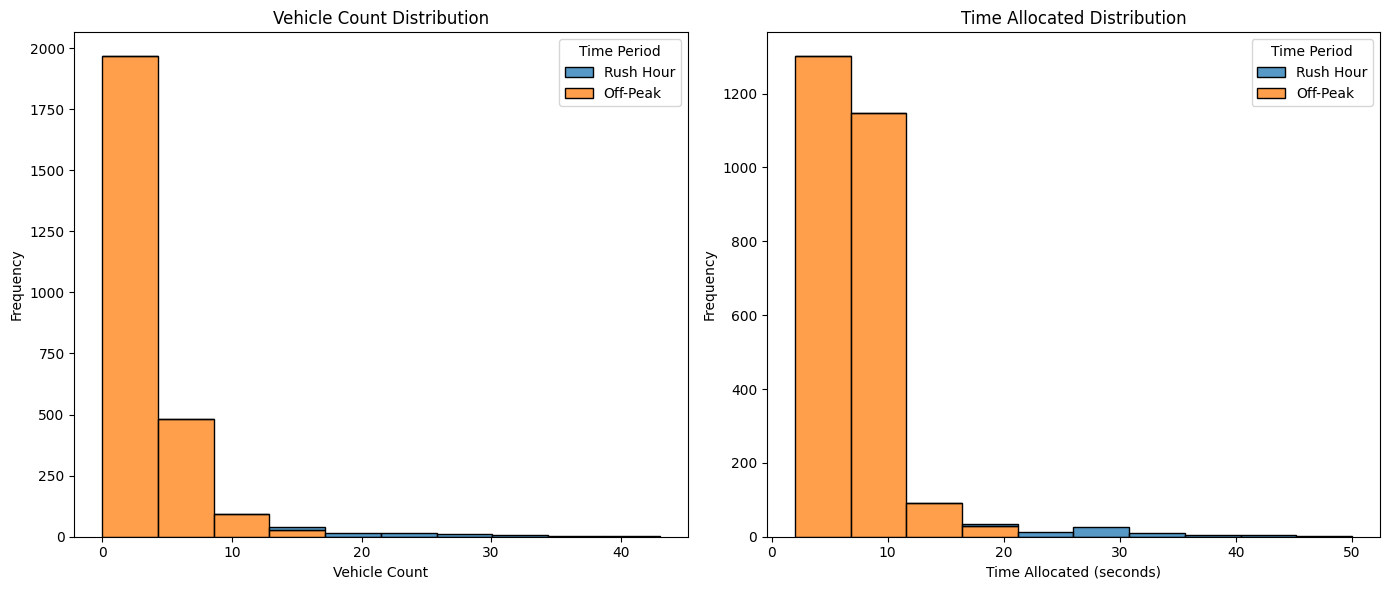

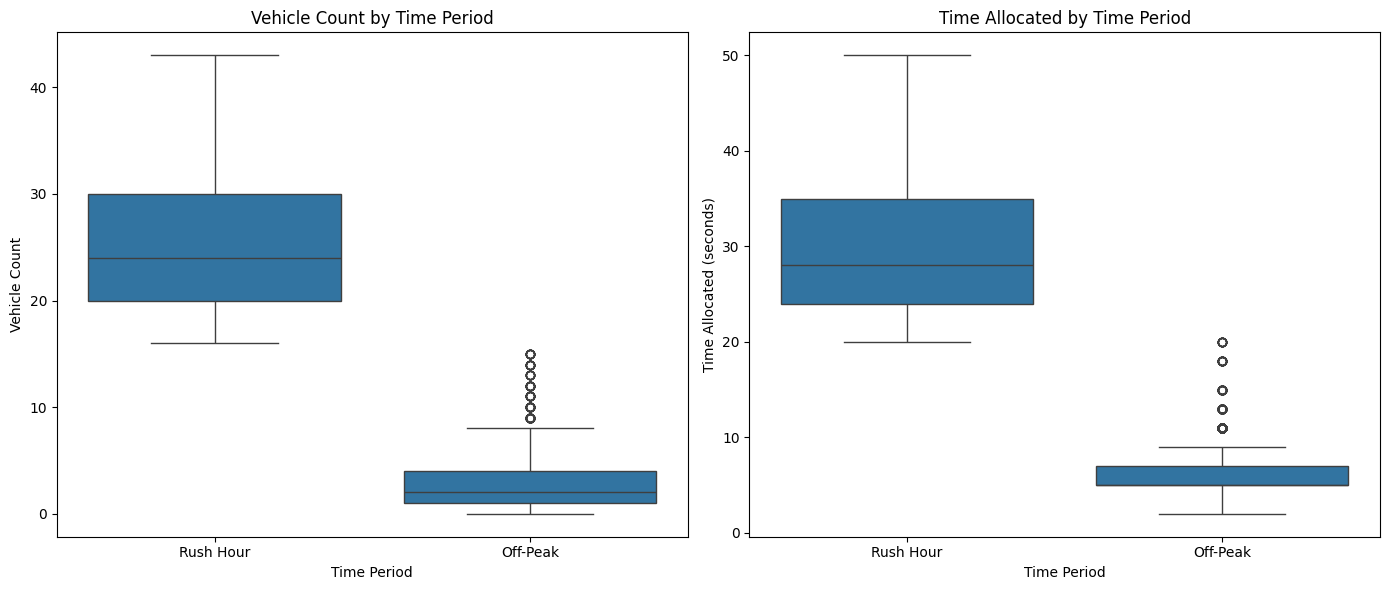

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine the DataFrames for easier plotting
df_rush['Time Period'] = 'Rush Hour'
df_off_peak['Time Period'] = 'Off-Peak'
combined_df = pd.concat([df_rush, df_off_peak])

# Plot histograms
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=combined_df, x='Vehicle Count', hue='Time Period', multiple='stack', bins=10)
plt.title('Vehicle Count Distribution')
plt.xlabel('Vehicle Count')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data=combined_df, x='Time Allocated (seconds)', hue='Time Period', multiple='stack', bins=10)
plt.title('Time Allocated Distribution')
plt.xlabel('Time Allocated (seconds)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot box plots
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=combined_df, x='Time Period', y='Vehicle Count')
plt.title('Vehicle Count by Time Period')

plt.subplot(1, 2, 2)
sns.boxplot(data=combined_df, x='Time Period', y='Time Allocated (seconds)')
plt.title('Time Allocated by Time Period')

plt.tight_layout()
plt.show()


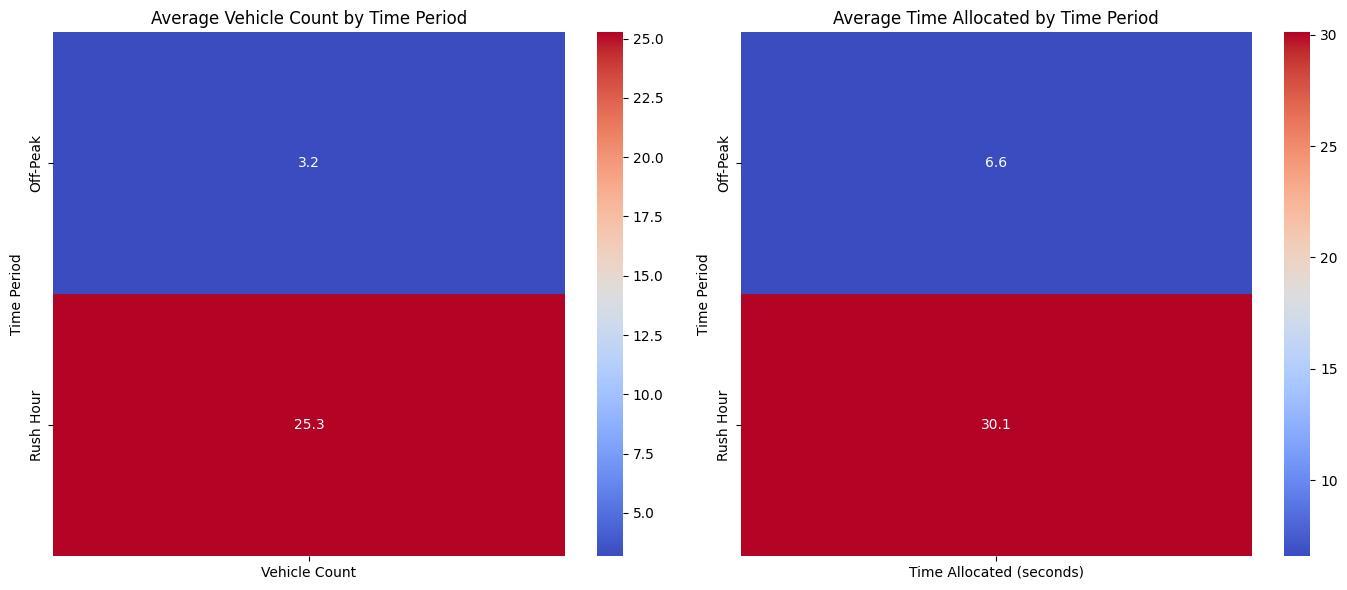

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample DataFrames for rush hours and off-peak times
data_rush = {
    'Vehicle Count': rush_time_data["Vehicle Count"].to_list(),
    'Time Allocated (seconds)': rush_time_data["Time Allocated (seconds)"].to_list()
}
data_off_peak = {
    'Vehicle Count': off_peak_time_data["Vehicle Count"].to_list(),
    'Time Allocated (seconds)': off_peak_time_data["Time Allocated (seconds)"].to_list()
}

df_rush = pd.DataFrame(data_rush)
df_off_peak = pd.DataFrame(data_off_peak)

# Combine DataFrames for plotting
df_rush['Time Period'] = 'Rush Hour'
df_off_peak['Time Period'] = 'Off-Peak'
combined_df = pd.concat([df_rush, df_off_peak])

# Heatmap of Vehicle Count and Time Allocated
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
heatmap_data = combined_df.pivot_table(index='Time Period', values='Vehicle Count', aggfunc='mean')
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Average Vehicle Count by Time Period')

plt.subplot(1, 2, 2)
heatmap_data = combined_df.pivot_table(index='Time Period', values='Time Allocated (seconds)', aggfunc='mean')
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Average Time Allocated by Time Period')

plt.tight_layout()
plt.show()


<ipython-input-58-9646e26ff31d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_values, x='Time Period', y='Vehicle Count', palette='viridis')
<ipython-input-58-9646e26ff31d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_values, x='Time Period', y='Time Allocated (seconds)', palette='viridis')


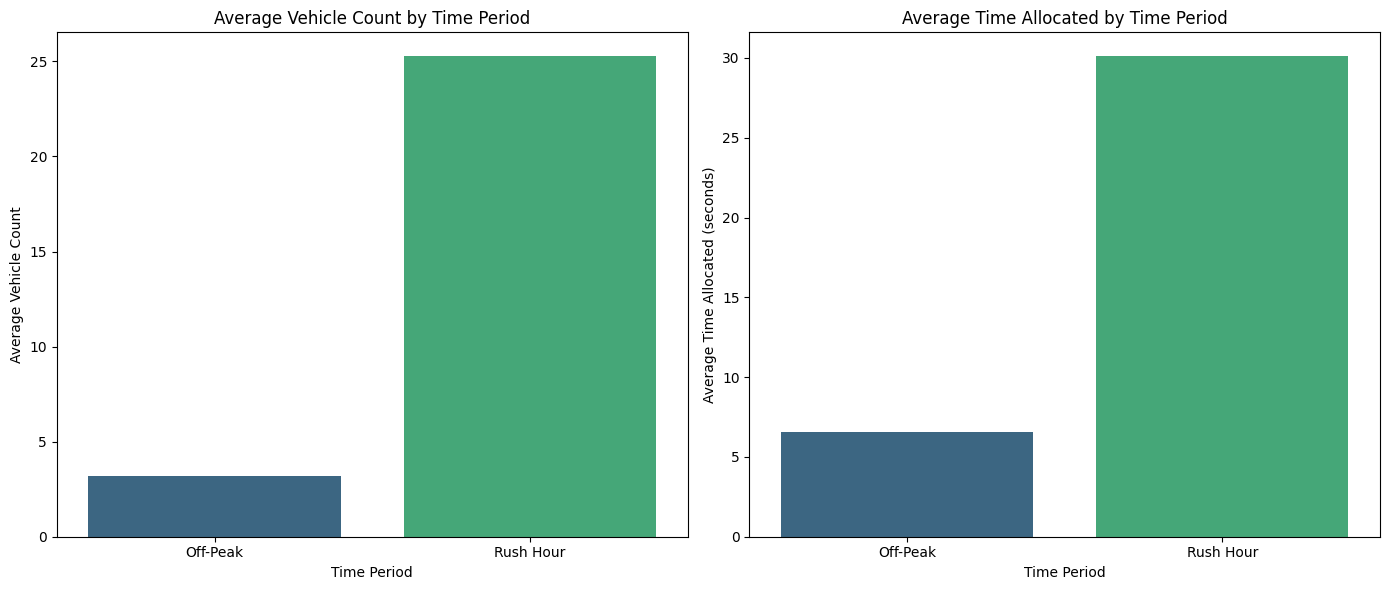

In [ ]:
# Calculate means for bar chart
mean_values = combined_df.groupby('Time Period').mean().reset_index()

# Bar charts for Vehicle Count and Time Allocated
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=mean_values, x='Time Period', y='Vehicle Count', palette='viridis')
plt.title('Average Vehicle Count by Time Period')
plt.xlabel('Time Period')
plt.ylabel('Average Vehicle Count')

plt.subplot(1, 2, 2)
sns.barplot(data=mean_values, x='Time Period', y='Time Allocated (seconds)', palette='viridis')
plt.title('Average Time Allocated by Time Period')
plt.xlabel('Time Period')
plt.ylabel('Average Time Allocated (seconds)')

plt.tight_layout()
plt.show()


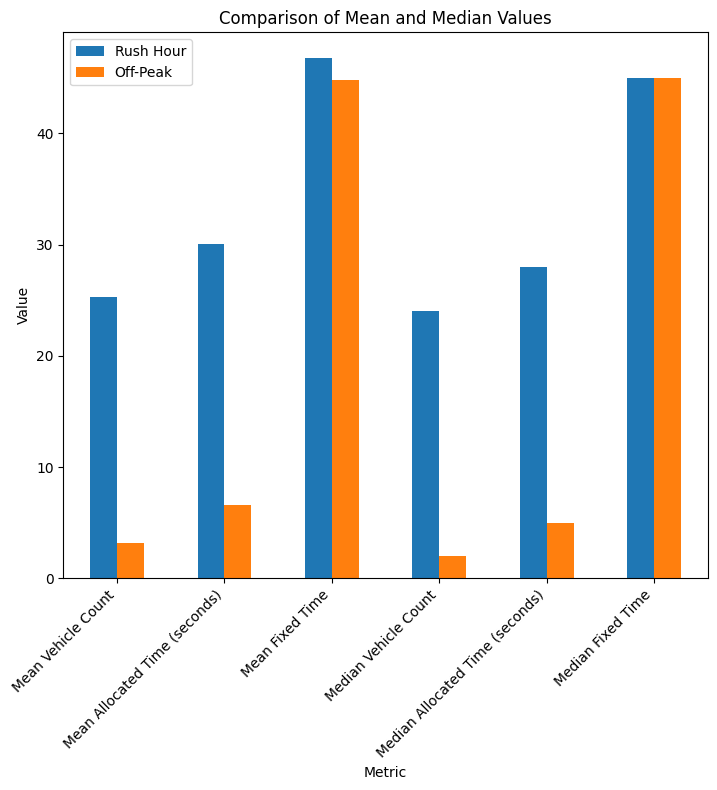

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for plotting
data_comparison = {
    'Metric': ['Mean Vehicle Count', 'Mean Allocated Time (seconds)', 'Mean Fixed Time',
               'Median Vehicle Count', 'Median Allocated Time (seconds)', 'Median Fixed Time'],
    'Rush Hour': [25.26, 30.10, 46.76, 24.00, 28.00, 45.00],
    'Off-Peak': [3.17, 6.59, 44.77, 2.00, 5.00, 45.00]
}

df_comparison = pd.DataFrame(data_comparison)

# Plotting
plt.figure(figsize=(14, 8))

# Mean values
plt.subplot(1, 2, 1)
df_comparison.set_index('Metric')[['Rush Hour', 'Off-Peak']].plot(kind='bar', ax=plt.gca(), color=['#1f77b4', '#ff7f0e'])
plt.title('Comparison of Mean and Median Values')
plt.ylabel('Value')
plt.xlabel('Metric')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


<ipython-input-60-1f729242cc64>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_df, x='Time Period', y='Vehicle Count', palette='coolwarm')
<ipython-input-60-1f729242cc64>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_df, x='Time Period', y='Time Allocated (seconds)', palette='coolwarm')


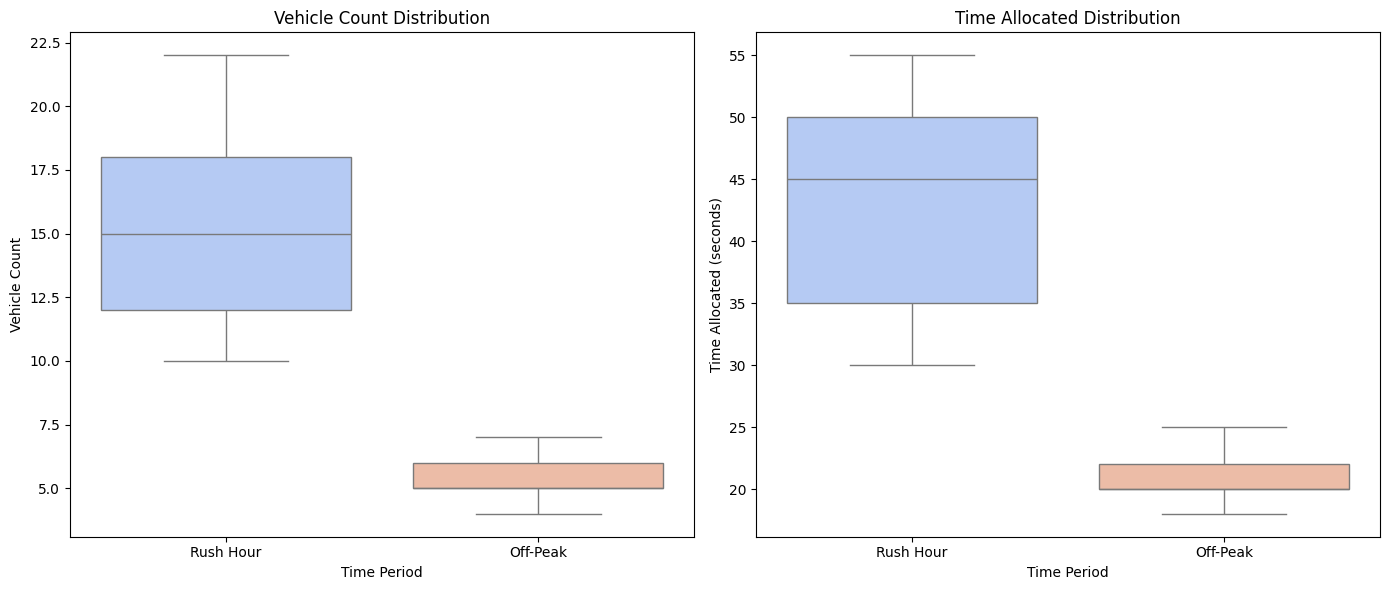

In [ ]:
# Sample DataFrames for visualization
df_rush = pd.DataFrame({
    'Vehicle Count': [10, 15, 12, 18, 22],
    'Time Allocated (seconds)': [30, 45, 35, 50, 55],
    'Time Period': 'Rush Hour'
})

df_off_peak = pd.DataFrame({
    'Vehicle Count': [5, 6, 4, 7, 5],
    'Time Allocated (seconds)': [20, 25, 18, 22, 20],
    'Time Period': 'Off-Peak'
})

combined_df = pd.concat([df_rush, df_off_peak])

# Box plots
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=combined_df, x='Time Period', y='Vehicle Count', palette='coolwarm')
plt.title('Vehicle Count Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(data=combined_df, x='Time Period', y='Time Allocated (seconds)', palette='coolwarm')
plt.title('Time Allocated Distribution')

plt.tight_layout()
plt.show()


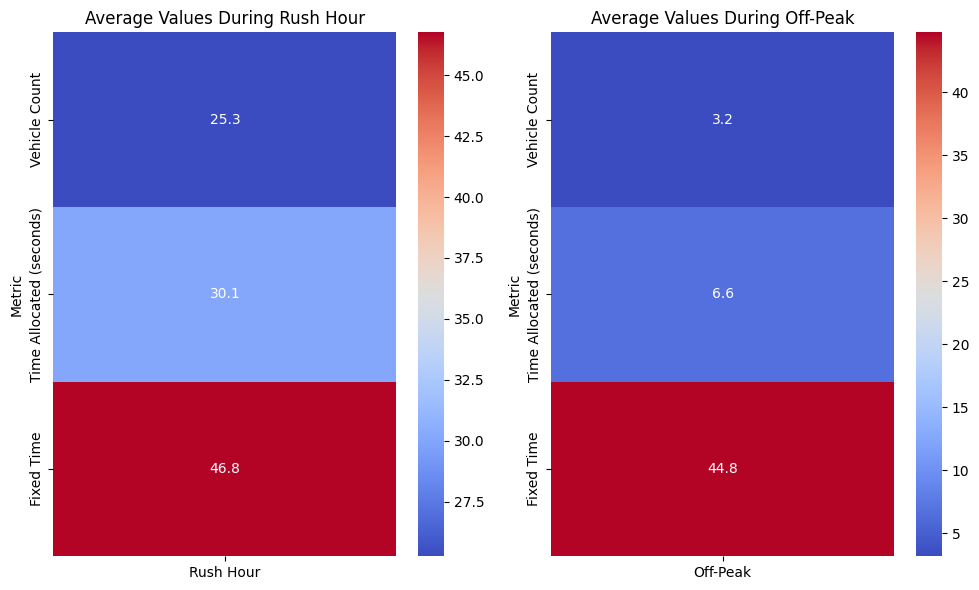

In [ ]:
# Create DataFrames for heatmaps
heatmap_data = {
    'Metric': ['Vehicle Count', 'Time Allocated (seconds)', 'Fixed Time'],
    'Rush Hour': [25.26, 30.10, 46.76],
    'Off-Peak': [3.17, 6.59, 44.77]
}

df_heatmap = pd.DataFrame(heatmap_data).set_index('Metric')

# Plot heatmaps
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.heatmap(df_heatmap[['Rush Hour']], annot=True, cmap='coolwarm', fmt='.1f', cbar=True)
plt.title('Average Values During Rush Hour')

plt.subplot(1, 2, 2)
sns.heatmap(df_heatmap[['Off-Peak']], annot=True, cmap='coolwarm', fmt='.1f', cbar=True)
plt.title('Average Values During Off-Peak')

plt.tight_layout()
plt.show()
